# Use case: Movies review sentiment analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

--2023-08-27 19:17:26--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  25.6MB/s    in 3.5s    

2023-08-27 19:17:29 (23.1 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [3]:
# The function that loop directory
import os
import re

In [4]:
# Function to Load the data :
def load_data(directory):
    data = {}
    data["review"] = []
    data["sentiment"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r") as file:
            data["review"].append(file.read())
        result = re.search(r"\d+_(\d+)\.txt" ,file_path)
        data["sentiment"].append(int(result.group(1)))
    return pd.DataFrame.from_dict(data)

In [5]:
# Load Training Data :
train_data = load_data('aclImdb/train/pos')
train_data = train_data.append(load_data("aclImdb/train/neg"))

<ipython-input-5-b5a0a01755e9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(load_data("aclImdb/train/neg"))


In [6]:
# Load testing data :
test_data = load_data('aclImdb/test/pos')
test_data = test_data.append(load_data("aclImdb/test/neg"))

<ipython-input-6-37970145370b>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(load_data("aclImdb/test/neg"))


In [7]:
# Print the first 5 rows of the train_data DataFrame :
print(train_data.head())

                                              review  sentiment
0  Nicely and intelligently played by the two you...         10
1  This will be somewhat short. First, don't list...          9
2  by saying that,I mean that this is not a well ...         10
3  Every time this film is on the BBC somebody in...          8
4  Match 1: Tag Team Table Match Bubba Ray and Sp...          9


In [8]:
train_data = train_data.sample(n=100,random_state=23)

# 'n' specifies the number of random samples you want to select
# 'random_state' sets a seed for reproducibility (optional)

In [9]:
test_data = test_data.sample(n=100,random_state=23)

In [10]:
train_data.head()

,review,sentiment
3637,Man oh man... I've been foolishly procrastinat...,10
11109,Cheech & Chong's Next Movie (1980) was the sec...,7
7908,It's a bit easy. That's about it.<br /><br />T...,10
4773,I read nothing but good things about this movi...,8
9782,"this movie is outrageous. by outrageous, i mea...",1


# Preprocess the Data

In [11]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()

def preprocess_data(text):
  #Remove HTML tags
  text = BeautifulSoup(text,'lxml').get_text()
  #TokenizeMthe text
  tokens = tokenizer.tokenize(text.lower())
  #Remove stop word
  filtered_tokens = [token for token in tokens if token not in stop_words]
  #Stem the tokens
  stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
  return ''.join(stemmed_tokens)

train_data['review'] = train_data['review'].apply(preprocess_data)
test_data['review'] = test_data['review'].apply(preprocess_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
print(train_data.iloc[1 , 0])

cheechchongnextmovi1980secondfilmstarpotloveduocheechmarintommichonglovablburnsmokerroommatlivecondemnbuildlookwayscoresmokelaydaycheechresponsonejobsteadigirlfriendonedaycheechwantgetfreaktrigetchonghousanothproblemariswellcheechbrotherredcheechanothroletownwanthangfirgurcouldkilltwobirdonestonecheechpawnchongredkindadventurchongredgetcheechgetfreaklongchonggowithoutsmokewatchcheechchongnextmovifindtommichongtakedirectorireignsequelreceivexperiuncreditworksmokefunnigoodfirstfilmcheechchongfanenjoyfollownicedreamrecommend


# Convert Sentiment Scores to Binary Values

In [14]:
train_data["sentiment"] = train_data["sentiment"].apply(lambda x:1 if x>= 7 else 0)
test_data["sentiment"] = test_data["sentiment"].apply(lambda x:1 if x>= 7 else 0)

# Feature Extraction with TF-lDF


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfid = TfidfVectorizer()
x_train = tfid.fit_transform(train_data['review'])
x_test = tfid.fit_transform(test_data['review'])
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [34]:
print(y_test.iloc[390])

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

# SVC

In [19]:
from sklearn import svm

In [20]:
svc = svm.SVC()
svc.fit(x_train, y_train)

SVC()

Neural Network

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
nn = Sequential()
nn.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
nn.add(Dense(units=1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.fit(x_train.toarray(), y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
4/4 - 1s - loss: 0.6882 - accuracy: 0.5200 - 688ms/epoch - 172ms/step
Epoch 2/10
4/4 - 0s - loss: 0.6834 - accuracy: 0.5600 - 13ms/epoch - 3ms/step
Epoch 3/10
4/4 - 0s - loss: 0.6791 - accuracy: 0.5800 - 9ms/epoch - 2ms/step
Epoch 4/10
4/4 - 0s - loss: 0.6750 - accuracy: 0.6000 - 13ms/epoch - 3ms/step
Epoch 5/10
4/4 - 0s - loss: 0.6710 - accuracy: 0.6400 - 10ms/epoch - 2ms/step
Epoch 6/10
4/4 - 0s - loss: 0.6670 - accuracy: 0.6900 - 12ms/epoch - 3ms/step
Epoch 7/10
4/4 - 0s - loss: 0.6632 - accuracy: 0.7100 - 12ms/epoch - 3ms/step
Epoch 8/10
4/4 - 0s - loss: 0.6593 - accuracy: 0.7700 - 9ms/epoch - 2ms/step
Epoch 9/10
4/4 - 0s - loss: 0.6555 - accuracy: 0.8000 - 9ms/epoch - 2ms/step
Epoch 10/10
4/4 - 0s - loss: 0.6517 - accuracy: 0.8100 - 8ms/epoch - 2ms/step


# Evaluate Models

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
# Predict values for the test set
rf_pred = rf.predict(x_test)
svc_pred = svc.predict(x_test)
nn_pred = (nn.predict(x_test.toarray()) > 0.5).astype("int32")

4/4 [==============================] - 0s 2ms/step


In [25]:
# Print classification reports
print(classification_report(y_test, rf_pred))
print(classification_report(y_test, svc_pred))
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        51
           1       0.53      0.53      0.53        49

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        51
           1       0.53      0.53      0.53        49

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.54      0.54      0.54       100

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        51
           1       0.50      0.47      0.48        49

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100



In [26]:
y_test.shape

(100,)

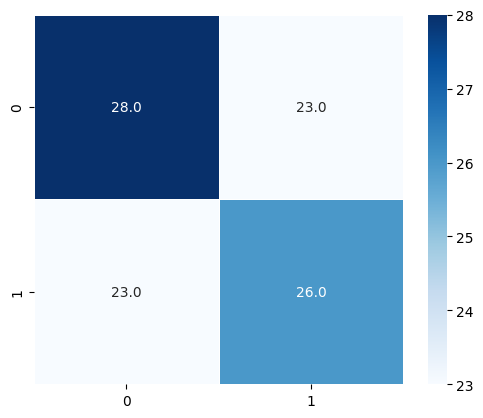

In [27]:
# Confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues')
plt.show()

# Repeat confusion matrix visualization for other models as needed